# Chapter 4

In [33]:
library(rethinking)
data(Howell1)
d <- Howell1

#### 4E1

likelyhood is

$$y_i \thicksim Normal(\mu, \sigma)$$

#### 4E2


Two - same as the priors

#### 4E3

$$Pr(\mu, \sigma|y) = \frac {\prod_i {Normal(y_i|\mu,\sigma)Normal(\mu|0,10)Uniform(\sigma|0,50)}} 
{\int\int \prod_i {Normal(y_i|\mu,\sigma)Normal(\mu|0,10)Uniform(\sigma|0,50)}d\mu d\sigma}$$


#### 4E4

$$\mu_i = \alpha + \beta x_i$$

#### 4E5

Three, just like the number of priors


#### 4M1

$$y_i \thicksim Normal(\mu, \sigma)$$

$$\mu \thicksim Normal(0,10)$$

$$\sigma \thicksim Uniform(0,10)$$

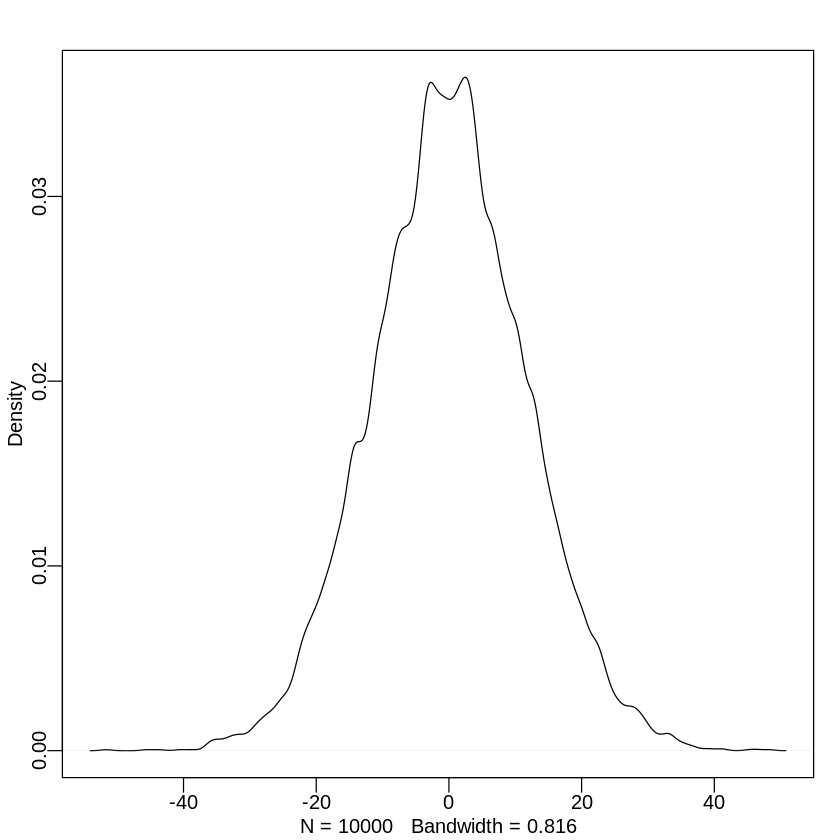

In [10]:
sample_mu <- rnorm(1e4, 0, 10)
sample_sigma <- runif(1e4, 0, 10)
prior_h <- rnorm(1e4, sample_mu, sample_sigma)
dens(prior_h)

## 4M2

In [12]:
flist <- alist(
  y ~ dnorm(mu, sigma),
  mu ~ dnorm(0,10),
  sigma ~ dunif(0,10)
)

## 4M3

$$y_i \thicksim Normal(\mu, \sigma)$$

$$\mu = \alpha + \beta * x_i$$

$$\alpha \thicksim Normal(0,50)$$

$$\beta \thicksim Uniform(0,10)$$

$$\sigma \thicksim Uniform(0,50)$$

## 4M4

$$height_i \thicksim Normal(\mu_i, \sigma)$$

$$\mu = \alpha +\beta year_i$$

$$\alpha \thicksim Normal(150,80)$$

For it to be meaningful to do such a study I assume students are not fully grown to begin with.

Allow the intercept to swing wildly.

$$\beta \thicksim Normal(10, 7)$$
Rather conservative prior (95% conf int between -4 to +24 cm / year), but want to keep "0" in the interval.


$$\sigma \thicksim Uniform(0,80)$$
It is reasonable to suspect that 95% of the sample are within 80 cm of length



## 4M5

$$\alpha \thicksim Normal(120, 80)$$
$$\beta \thicksim Normal(10,5)$$


## 4M6

$$\sigma \thicksim Uniform(0,64)$$

## 4H1

Make a regression weight ~ height and calculate height and HPDI from this


$$h_i \thicksim Normal(\mu_i, \sigma)$$
$$\mu_i = \alpha + \beta * x_i$$
$$\alpha \thicksim Normal(178, 100)$$
$$\beta \thicksim Normal(0, 10)$$
$$\sigma \thicksim Normal(0, 50)$$

In [34]:
d2 <- d[d$age >= 18,]
d2$weight.c <- d2$weight - mean(d2$weight)
m4H1 <- map(alist(
  height ~ dnorm(mu, sigma),
  mu <- a + b*weight.c,
  a ~ dnorm(178,100),
  b ~ dnorm(0,10),
  sigma ~ dunif(0,50)
), data = d2)

In [35]:
precis(m4H1, corr=TRUE)
mean(d2$height)

        Mean StdDev   5.5%  94.5% a b sigma
a     154.60   0.27 154.17 155.03 1 0     0
b       0.91   0.04   0.84   0.97 0 1     0
sigma   5.07   0.19   4.77   5.38 0 0     1

[1] 154.5971

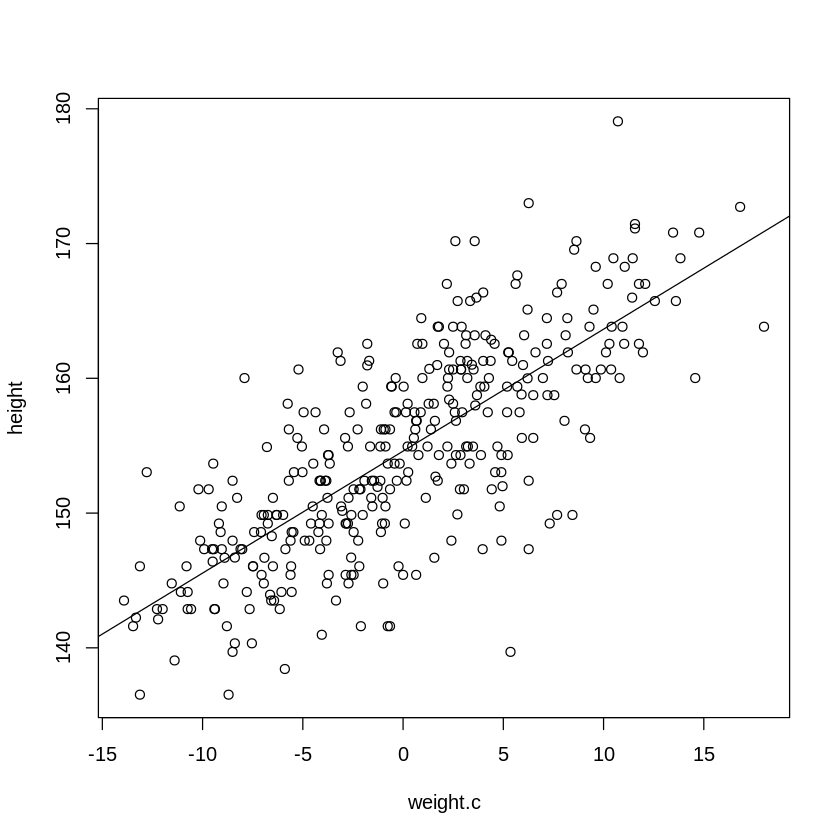

In [36]:
plot(height ~ weight.c, data = d2)
abline(a = coef(m4H1)["a"], b = coef(m4H1)["b"])

In [54]:
weights_4H1 <- c(46.95, 43.72, 64.78, 32.59, 54.63) - mean(d2$weight)
mu <- link(m4H1, data = data.frame(weight.c = weights_4H1))
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.89)
mu.mean

[ 1000 / 1000 ]


[1] 156.3655 153.4403 172.5127 143.3608 163.3206

In [55]:
mu.HPDI

|0.89,155.9373,152.9576,171.1652,142.4732,162.6086
0.89|,156.8328,153.8150,173.9288,144.3276,164.1294


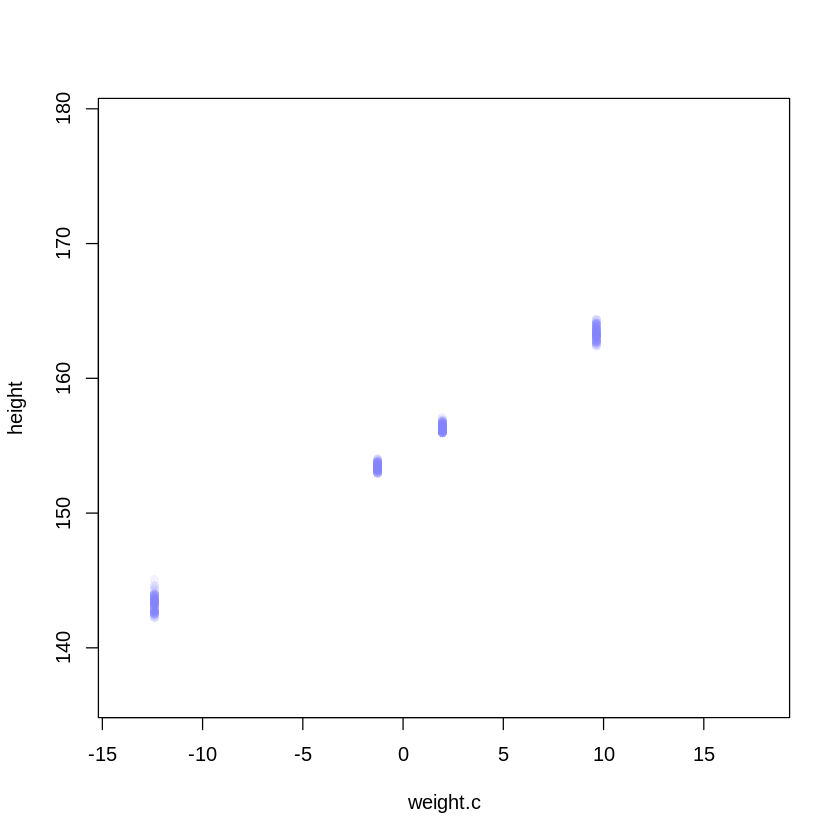

In [56]:
plot(height ~ weight.c, d2, type = "n")
for (i in 1:100)
  points(weights_4H1, mu[i,], pch = 16, col = col.alpha(rangi2, 0.1))

In [19]:
#### 4H2

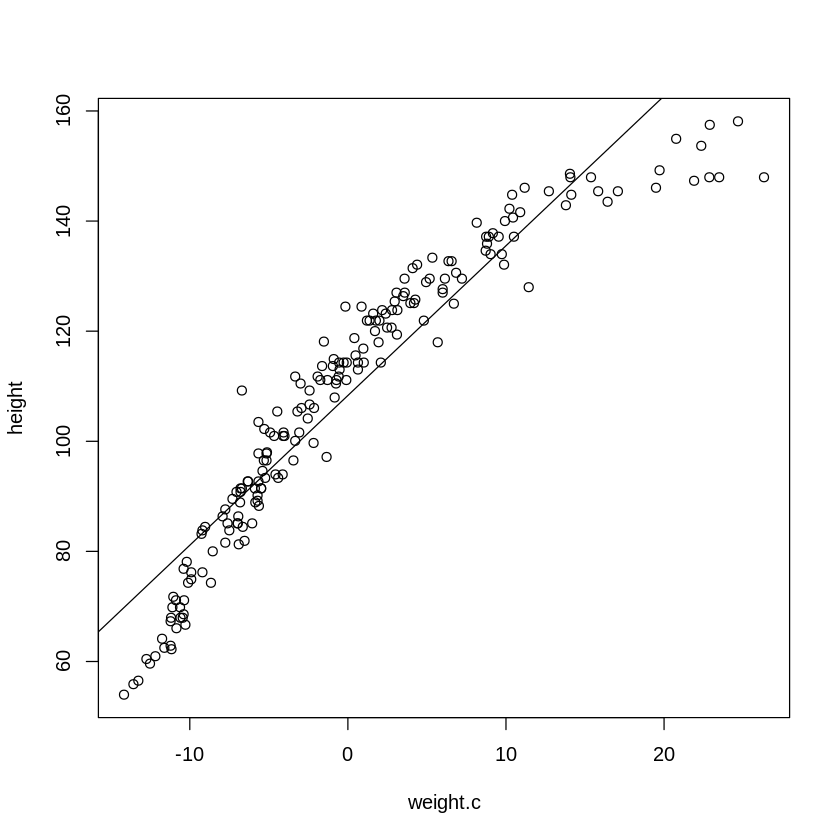

In [41]:
d3 <- d[d$age < 18,]

d3$weight.c <- d3$weight - mean(d3$weight)
m4H2 <- map(alist(
  height ~ dnorm(mu, sigma),
  mu <- a + b*weight.c,
  a ~ dnorm(150,100),
  b ~ dnorm(0,10),
  sigma ~ dunif(0,50)
), data = d3)

plot(height ~ weight.c, data = d3)
abline(a = coef(m4H2)["a"], b = coef(m4H2)["b"])

## 4H3

In [42]:
m4H3 <- map(alist(
  height ~ dnorm(mu, sigma),
  mu <- a + b* log(weight),
  a ~ dnorm(178,100),
  b ~ dnorm(0,100),
  sigma ~ dunif(0,50)
), data = d)


In [47]:
weights.seq <- seq(from = 1, to = 70, by = 1)

mu <- link(m4H3, data = data.frame(weight = weights.seq))
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.89)
mu.mean

[ 1000 / 1000 ]


[1] -23.730163   8.890796  27.972834  41.511755  52.013359  60.593793
 [7]  67.848447  74.132714  79.675831  84.634318  89.119814  93.214752
[13]  96.981730 100.469406 103.716355 106.753674 109.606795 112.296790
[19] 114.841307 117.255277 119.551444 121.740774 123.832767 125.835711
[25] 127.756880 129.602689 131.378828 133.090365 134.741837 136.337315
[31] 137.880472 139.374633 140.822811 142.227754 143.591969 144.917749
[37] 146.207202 147.462266 148.684727 149.876236 151.038322 152.172403
[43] 153.279798 154.361733 155.419352 156.453726 157.465853 158.456671
[49] 159.427057 160.377839 161.309792 162.223648 163.120096 163.999787
[55] 164.863336 165.711325 166.544304 167.362796 168.167296 168.958274
[61] 169.736177 170.501432 171.254441 171.995592 172.725251 173.443771
[67] 174.151485 174.848714 175.535764 176.212928

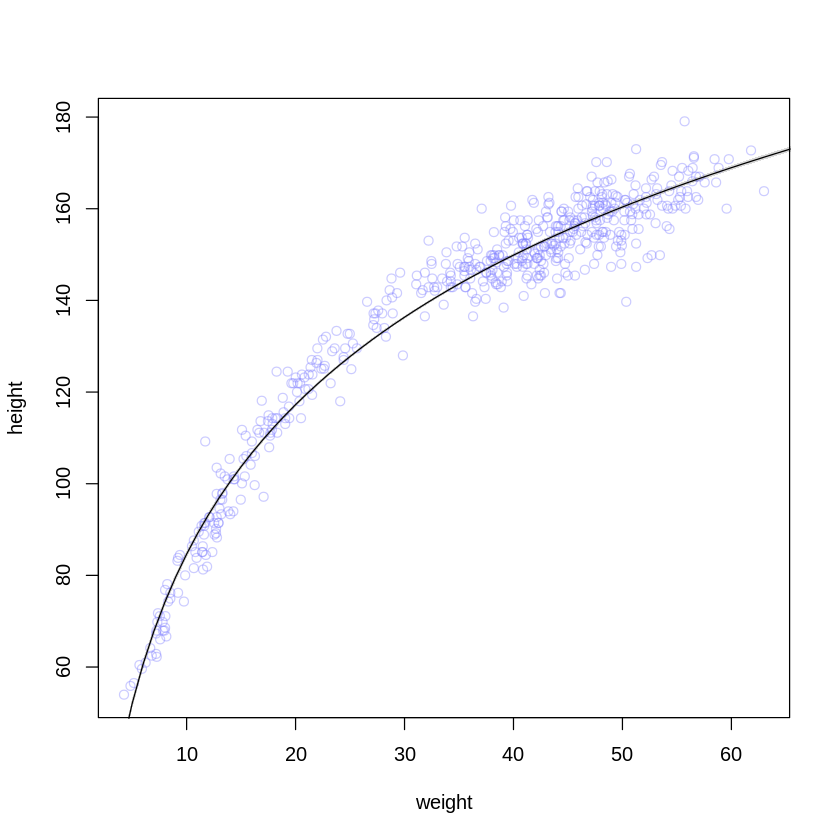

In [48]:
plot(height ~ weight, data = d, col = col.alpha(rangi2, 0.4))
lines(weights.seq, mu.mean)
shade(mu.HPDI, weights.seq)